# 클러스터링(clustering)

- 하나의 데이터를 알고리즘에 따라 여러개의 부분집합으로 분할한다.  
- 이때 이러한 부분집합을 클러스터(cluster)라고 칭한다.
- 하나의 클러스터는 특정하지않은 잠재적인 개념에 대응하게된다.

클러스터링을 통해 자동으로 클러스터가 구성되면 클러스터가 대응하는 개념은 사용자가 명명한다.


클러스터링은 하나의 단독 프로세스로 데이터 내의 분포구조를 찾는데 사용하기도 하고 하나의 사전프로세스로서 다른 학습 문제 해결의 전단계에서만 사용되기도한다.

### 성능척도(유효성지표=validity index)

지도학습에서는 성능측정방법으로 mse나 f1-score와 같은 방법들을 사용했다면 클러스터링에서는 어떤 방식으로 성능을 평가할지 알아보려고한다.

**먼저 직관적으로 생각해보자 어떠한 형태가 군집화결과가 좋다고 할 수 있을까?**  
비슷한 샘플끼리 함께 클러스터링 되는 것이 가장 좋은 형태라고 할 수 있을 것이다.  
(이를 클러스터링 결과의 클러스터 내 유사도는 높고 클러스터간 유사도는 낮은 것이라고 바꿔 표현할 수 있다.)

**클러스터링의 성능 척도는 크게 두가지로 나눌 수  있다.**
- 외부 지표
- 내부 지표

외부지표(external index)는 간단하게 클러스터링 결과를 해당 도메인 전문가가 분류한 결과를 비교하는 것을 말하고 그렇지 않고 다른 참고 모델을 사용하지않는다면 내부지표(internal index)라고 한다.

**외부지표에 대해서 알아보자.**  
먼저 하나의 예를 가정하자.
- 데이터세트: $D$={$x_1,x_2,...,x_m$}
- 클러스터링을 통해 분할된 클러스터: $C1$={$C1_1,C1_2,...,C1_k$}
- 참고 모델의 분할 클러스터: $C2$={$C2_1,C2_2,...,C2_k$}
- 클러스터링을 통해 분할된 클러스터에 대응하는 클러스터 레이블 벡터: $\lambda1$
- 참고 모델의 분할 클러스터에 대응하는 클러스터 레이블 벡터: $\lambda2$

샘플들을 두개씩 짝지어 고려하면 식을 아래와 같이 나타낼 수 있다.  
$a=|SS|,SS=${$(x_i,y_i)|\lambda1_i=\lambda1_j,\lambda2_i=\lambda2_j,i<j)$}  
$b=|SD|,SD=${$(x_i,y_i)|\lambda1_i=\lambda1_j,\lambda2_i\ne\lambda2_j,i<j)$}  
$c=|DS|,DS=${$(x_i,y_i)|\lambda1_i\ne\lambda1_j,\lambda2_i=\lambda2_j,i<j)$}  
$d=|DD|,DD=${$(x_i,y_i)|\lambda1_i\ne\lambda1_j,\lambda2_i\ne\lambda2_j,i<j)$}  

**식에 대한 설명**  
집합SS는 C1에서 같은 클러스터에 속하고 C2에서도 같은 클러스터를 샘플 쌍을 포함한다.  
집합SD는 C1에서 같은 클러스터에 속하지만 C2에서는 다른 클러스터에 속하는 샘플 쌍을 포함한다.  
  
각 샘플 쌍$(x_i,x_j)(i<j)$는 하나의 집합에만 나타나므로 식 a+b+c+d=m(m-1)/2가 성립

**위의 식에 기반해 아래와 같은 외부 지표를 도출**  
- Jaccard 계수: $JC=\frac{a}{a+b+c}$  
- FM 지수: $FMI=\sqrt{\frac{a}{a+b}\times\frac{a}{a+c}}$  
- Rand 지수: $RI=\frac{2(a+d)}{m(m-1)}$  
  
[0,1]구간에 있고  클수록 좋음

**외부지표에 대해서 알아보자.**   
클러스터링 결과의 클러스터분할 $C=${$C_1,C_2,...,C_k$}을 고려하면 다음과 같이 정의 가능함   
  
- 클러스터 $C$ 내 샘플들의 평균거리($avg(C)$)  
$\frac{2}{|C|(|C|-1)}\displaystyle\sum_{}^{}{}_{1\leq i\leq j\leq|C|}dist(x_i,x_j)$   
<br>
- 클러스터 $C$ 내 샘플 간의 최대거리($diam(C)$)  
$max_{1\leq i\leq j\leq|C|}dist(x_i,x_j)$    
<br>  
- 클러스터 $C_i$와 $C_j$간 샘플의 최단거리($d_{min}(C_i,C_j)$)  
$min_{x_i\in C_i,x_j\in C_j}dist(x_i,x_j)$   
<br>  
- 클러스터 $C_i$와 $C_j$ 중심점간의 거리($d_{cen}(C_i,C_j)$)  
$dist(\mu_i,\mu_j)$

**위의 식에 기반해 아래와 같은 내부 지표를 도출**  
- DB지수(DB)   
$\frac{1}{k}\displaystyle\sum_{i=1}^{k}max(\frac{avg(C_i)+avg(C_j)}{d_{cen}(C_i,C_j)})$  
- Dunn지수(DI)  
$min${$min(\frac{d_{min}(C_i,C_j)}{max diam(C_l)}$}

### 거리 계산법

만약 함수 dist(.,.)가 계산척도라면 아래 기본 성질들을 만족해아한다. 
- 비음수성:$dist(x_i,x_j)\geq 0$
- 동일성: $x_i=x_j$일때만, $dist(x_i,x_j)=0$  
- 대칭성: $dist(x_i,x_j)=dist(x_i,x_j)$
- 삼각부등식 성질: $dist(x_i,x_j)\leq dist(x_i,x_k)+dist(x_i,x_j)$

샘플을 $x_i=(x_{i1};x_{i2};...;x_{in})$과 $x_j=(x_{j1};x_{j2};...;x_{jn})$처럼 정의한다면 가장 자주 사용되는 것은 민코프스키 거리다.

$dist_{mk}(x_i,x_j)=(\displaystyle\sum_{u=1}^{n}{|x_{iu}-x_{ju}|^p})^{\frac{1}{p}}$

p=2일때 유클리디안거리(Euclidean distance)  
p=1일때 맨해튼거리(Manhattan distance)  

**클러스터링 알고리즘에는 프로토타입 클러스터링에 속하는 K-means clustering, Learning Vector Quantization, Mixture of Gaussian과 밀도 클러스터링에 속하는 Denstiy-Based Spatial Clustering of Applications with Noise, 계층 클러스터링에 속하는 AGglomerative NES-ting이 있지만 대표적으로 많이 알려져있는 <U>K평균 클러스터링 알고리즘(K-means alogorithm)</U>에 대해서만 다룰려고한다.**

# k-means clustering algorithm 

k평균 클러스터링은 주어진 데이터를 K개 묶어 그룹화하며 클러스터링을 통해 분할한 클러스터에 대해 평균 오차를 최소화하는 형태로 동작한다.

$E=\displaystyle\sum_{i=1}^{k}{}\displaystyle\sum_{x\in C_i}^{}{||x-\mu_i||}^2_2$


**코드를 통해 간단하게 클러스터링을 진행해보기**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

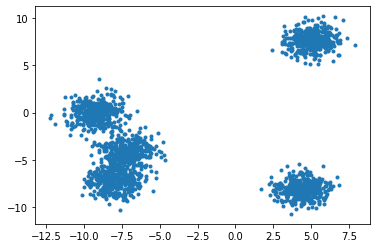

In [2]:
X,y=make_blobs(n_samples=2000,centers=5,cluster_std=0.9)
plt.scatter(X[:,0],X[:,1],marker='.')

In [3]:
k_means=KMeans(n_clusters=5,n_init=10)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
k_means_labels=k_means.labels_
k_means_cluster_centers=k_means.cluster_centers_

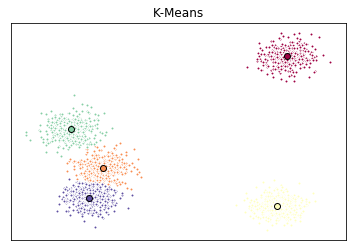

In [5]:
fig=plt.figure(figsize=(6,4))
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))

ax=fig.add_subplot(1,1,1)

for k,col in zip(range(5),colors):
    my_members=(k_means_labels==k)
    
    cluster_center=k_means_cluster_centers[k]
    
    ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.')
    ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
    
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

참고: https://needjarvis.tistory.com/719